In [1]:
import k3d
import numpy as np

In [27]:
from points2trc import *
points = read_points('C:\\Users\\wangs\\dev\\pose2sim\\data\\keypoints\\res_5mrun_front\\joints-000000.txt')
pts = np.array(points).reshape((-1, 3)).astype(np.float32)*-1
pts = pts[:, [2,1,0]]

In [87]:
plot = k3d.plot()

# colors = np.array([((i[0]<<16) + (i[1]<<8) + i[2]) for i in nuclei]).astype(np.uint32)

points = k3d.points(pts, point_size = 0.02)
plot += points
plot.display()



plot.start_auto_play()


c:\Users\wangs\miniconda3\envs\opensim\lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

In [120]:
df = read_points_video('C:\\Users\\wangs\\dev\\pose2sim\\data\\keypoints\\res_hand_coordination')
df = ydown2yup(df)
keypoints_names=[
    "LKnee", "RKnee", 
    "LAnkle", "RAnkle", 
    "LHip", "RHip",
    "LWrist", "RWrist",
    "LElbow", "RElbow",
    "LShoulder", "RShoulder",
    "LFoot", "RFoot", "Head", "Neck", "Pelvis"
]

keypoints_names=[
        "LKnee", "RKnee", 
        "LAnkle", "RAnkle", 
        "LHip", "RHip",
        "LWrist", "RWrist",
        "LElbow", "RElbow",
        "LShoulder", "RShoulder",
        "LFoot", "RFoot", "Nose", "Neck", "Pelvis"
    ]
POINTS_KEYS = {
    'Pelvis': 0,
    'LHip': 1,
    'RHip': 2,
    'Spine1': 3,
    'LKnee': 4,
    'RKnee': 5,
    'Spine2': 6,
    'LAnkle': 7,
    'RAnkle': 8,
    'Spine3': 9,
    'LFoot': 10,
    'RFoot': 11,
    'Neck': 12,
    'LCollar': 13,
    'RCollar': 14,
    'Nose': 15,
    'LShoulder': 16,
    'RShoulder': 17,
    'LElbow': 18,
    'RElbow': 19,
    'LWrist': 20,
    'RWrist': 21,
    'LHand': 22,
    'RHand': 23
}

points_key_index = [POINTS_KEYS[k] for k in keypoints_names]
points_col_index = []
for i in points_key_index:
    for j in range(3):
        points_col_index.append(i*3+j)
        
df = df.loc[:, points_col_index]
from Pose2Sim.filter_3d import *
import toml
config = toml.load(r"Pose2Sim\Demo\User\Config.toml")
filter_type = config.get('3d-filtering').get('type')
df = df.apply(filter1d, axis=0, args = [config, filter_type])

In [92]:
plot = k3d.plot()

# colors = np.array([((i[0]<<16) + (i[1]<<8) + i[2]) for i in nuclei]).astype(np.uint32)

for i in range(0,1):
    pts = df.loc[i,:].values.reshape((-1,3))
    points = k3d.points(pts, point_size = 0.02)
    plot += points
    plot.display()


plot.start_auto_play()

c:\Users\wangs\miniconda3\envs\opensim\lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

In [32]:
df = read_points_video('C:\\Users\\wangs\\dev\\pose2sim\\data\\keypoints\\res_5mrun_front')
cols = list(df.columns)

In [34]:
def ydown2yup(Q):
    '''
    Turns Z-down system coordinates into Y-up coordinates

    INPUT:
    - Q: pandas dataframe
    N 3D points as columns, ie 3*N columns in Z-up system coordinates
    and frame number as rows

    OUTPUT:
    - Q: pandas dataframe with N 3D points in Y-up system coordinates
    '''
    
    # X-> -Z, Y-> -Y, Z-> -X
    cols = list(Q.columns)
    cols = np.array([[cols[i*3+2],cols[i*3+1],cols[i*3]] for i in range(int(len(cols)/3))]).flatten()
    Q = Q[cols]*-1

    return Q

In [56]:
df.shape

(93, 51)

<IPython.core.display.Javascript object>


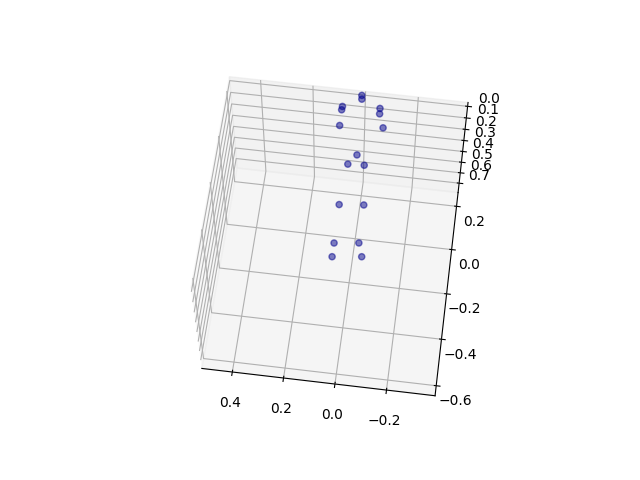

In [121]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def update_points(num, dataframe):
        # NOTE: there is no .set_data() for 3 dim data...
    points = dataframe.loc[num, :].values.reshape((-1,3)).T
    x,y,z = points
    sc._offsets3d=(x,y,z)
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = len(df)

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
sc = ax.scatter([],[],[], c='darkblue', alpha=0.5)


# Setting the axes properties
# ax.set(xlim3d=(0, 1), xlabel='X')
# ax.set(ylim3d=(0, 1), ylabel='Y')
# ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_points, num_steps, fargs=(df,), interval=100)

plt.show()

<IPython.core.display.Javascript object>


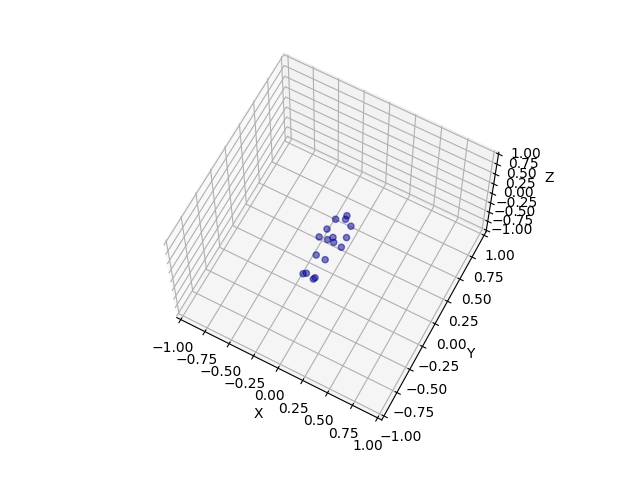

In [115]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
x,y,z = df.loc[0,:].values.reshape((-1,3)).T
ax.set(xlim3d=(-1, 1), xlabel='X')
ax.set(ylim3d=(-1, 1), ylabel='Y')
ax.set(zlim3d=(-1, 1), zlabel='Z')
ax.scatter([], [], [])
sc = ax.scatter([],[],[], c='darkblue', alpha=0.5)
sc._offsets3d=(x,y,z)
plt.show()

In [114]:
dir(sc)

['_A',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiaseds',
 '_axes',
 '_bcast_lwls',
 '_callbacks',
 '_capstyle',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_default_contains',
 '_depthshade',
 '_edge_default',
 '_edge_is_mapped',
 '_edgecolors',
 '_face_is_mapped',
 '_facecolors',
 '_factor',
 '_fully_clipped_to_axes',
 '_get_default_antialiased',
 '_get_default_edgecolor',
 '_get_default_facecolor',
 '_get_default_linewidth',
 '_gid',
 '_hatch',
 '_hatch_color',
 '_id_norm',
 '_in_draw',
 '_in_layout',
 '_internal_update',
 '_joinstyle',
 '_label',
 '_